In [1]:
# Downloading the dataset
# !pwd
#ls local_training_data/dogs-cats/train
# !ls local_training_data/dogs-cats-small
import os, shutil

In [2]:
# define dataset dir
original_dataset_dir = 'local_training_data/dogs-cats/train'
base_dir = 'local_training_data/dogs-cats-small'

In [3]:
# make directories
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
print('train_dir:', train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
print('validation_dir:', validation_dir)

test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
print('test_dir:', test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)
print('train_cats_dir:', train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)
print('train_dogs_dir:', train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)
print('validation_cats_dir:', validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)
print('validation_dogs_dir:', validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)
print('test_cats_dir:', test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)
print('test_dogs_dir:', test_dogs_dir)

train_dir: local_training_data/dogs-cats-small/train
validation_dir: local_training_data/dogs-cats-small/validation
test_dir: local_training_data/dogs-cats-small/test
train_cats_dir: local_training_data/dogs-cats-small/train/cats
train_dogs_dir: local_training_data/dogs-cats-small/train/dogs
validation_cats_dir: local_training_data/dogs-cats-small/validation/cats
validation_dogs_dir: local_training_data/dogs-cats-small/validation/dogs
test_cats_dir: local_training_data/dogs-cats-small/test/cats
test_dogs_dir: local_training_data/dogs-cats-small/test/dogs


In [4]:
# Copies the first 1,000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
# Copies the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
# Copies the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
# Copies the first 1,000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
# Copies the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
# Copies the next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
# do sanity check
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [11]:
# Building your network
from keras import layers
from keras import models

# define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [12]:
# compile the model
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [13]:
# Data preprocessing
# ImageDataGenerator to read images from directories
from keras.preprocessing.image import ImageDataGenerator

# create data generator
# rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, # target directory
    target_size=(150, 150), # Resizes all images to 150 × 150
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
# test generator
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [15]:
# fit the model
# calculate: steps_per_epoch => number of batches fetched
# batches = 20 samples, steps_per_epoch/batches = 100, then  2,000 samples
# steps_per_epoch = total_samples / batch_size
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

/var/folders/cg/xkrtyvkn46v_d07jqjh0zkp40000gn/T/ipykernel_5923/1374918029.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 13s 125ms/step - loss: 0.7547 - acc: 0.5130 - val_loss: 0.6877 - val_acc: 0.6170
Epoch 2/30
100/100 [==============================] - 13s 128ms/step - loss: 0.6913 - acc: 0.5735 - val_loss: 0.6832 - val_acc: 0.5840
Epoch 3/30
100/100 [==============================] - 14s 138ms/step - loss: 0.6969 - acc: 0.6345 - val_loss: 0.6758 - val_acc: 0.6110
Epoch 4/30
100/100 [==============================] - 13s 128ms/step - loss: 0.6081 - acc: 0.6790 - val_loss: 0.7614 - val_acc: 0.5770
Epoch 5/30
100/100 [==============================] - 13s 125ms/step - loss: 0.5891 - acc: 0.7155 - val_loss: 0.6238 - val_acc: 0.6520
Epoch 6/30
100/100 [==============================] - 13s 127ms/step - loss: 0.5309 - acc: 0.7265 - val_loss: 0.7246 - val_acc: 0.6660
Epoch 7/30
100/100 [==============================] - 13s 129ms/step - loss: 0.4916 - acc: 0.7685 - val_loss: 0.7056 - val_acc: 0.6960
Epoch 8/30
100/100 [==============================] - 1

In [16]:
model.save('trained_models/cats_and_dogs_small_1.h5')

/Users/jcolamendy/python/ml-tutorials/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
import matplotlib.pyplot as plt

history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

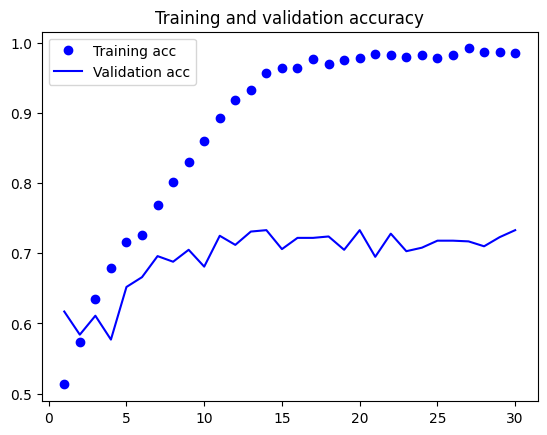

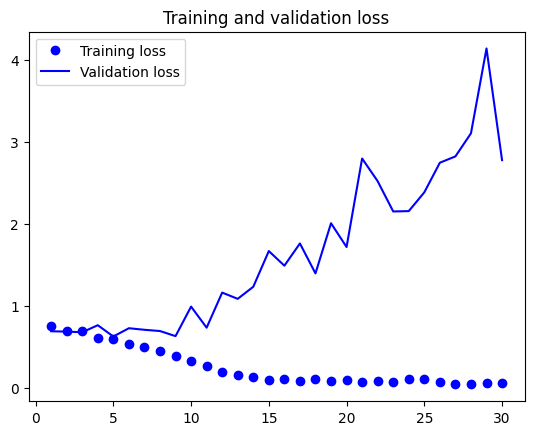

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%.
# The validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0.

In [ ]:
# Using data augmentation
# Overfitting is caused by having too few samples to learn from, rendering you unable to train a model that can generalize to new data.
# Data augmentation takes the approach of generating more training data from existing training samples,
# by augmenting the samples via a number of random transformations that yield believable-looking images.

# In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the ImageDataGenerator

In [19]:
# defining a new convnet that includes dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [20]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [27]:
# Training the convnet using data-augmentation generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [30]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
# train using data augmentation
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
)

Epoch 1/100
100/100 [==============================] - 13s 126ms/step - loss: 0.5557 - acc: 0.7390 - val_loss: 0.4991 - val_acc: 0.7860
Epoch 2/100
100/100 [==============================] - 13s 130ms/step - loss: 0.5271 - acc: 0.7465 - val_loss: 0.4767 - val_acc: 0.7790
Epoch 3/100
100/100 [==============================] - 13s 131ms/step - loss: 0.5360 - acc: 0.7390 - val_loss: 0.4533 - val_acc: 0.8110
Epoch 4/100
100/100 [==============================] - 13s 133ms/step - loss: 0.5305 - acc: 0.7430 - val_loss: 0.4502 - val_acc: 0.7900
Epoch 5/100
100/100 [==============================] - 13s 130ms/step - loss: 0.5219 - acc: 0.7460 - val_loss: 0.4418 - val_acc: 0.8100
Epoch 6/100
100/100 [==============================] - 13s 130ms/step - loss: 0.5214 - acc: 0.7570 - val_loss: 0.4680 - val_acc: 0.7840
Epoch 7/100
100/100 [==============================] - 13s 130ms/step - loss: 0.5161 - acc: 0.7560 - val_loss: 0.4459 - val_acc: 0.8150
Epoch 8/100
100/100 [===========================

In [34]:
model.save('trained_models/cats_and_dogs_small_2.h5')

/Users/jcolamendy/python/ml-tutorials/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


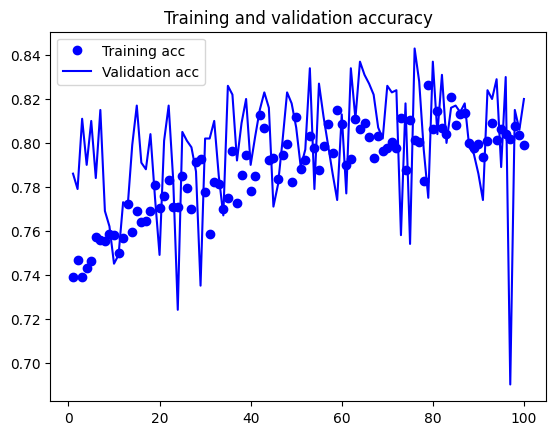

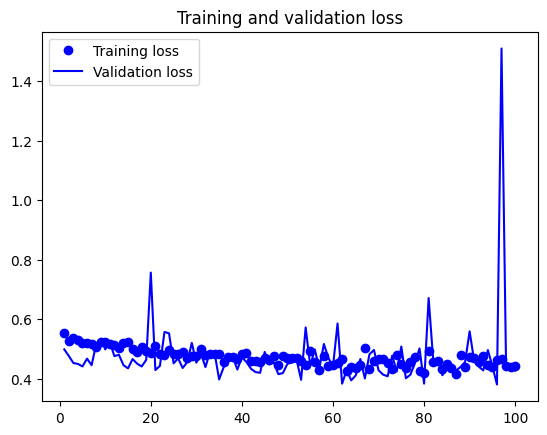

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Using a pretrained convnet - feature extraction
# Feature extraction consists of taking the convolutional base of a previously trained network
# running the new data through it, and training a new classifier on top of the output
# Use the convolutional base of the VGG16 network, trained on ImageNet, to extract interesting features from cat and dog images, 
# and then train a dogs-versus-cats classifier on top of these features

In [36]:
# Instantiating the VGG16 convolutional base
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', # specifies the weight checkpoint from which to initialize the model
              include_top=False, # refers to including (or not) the densely connected classifier on top of the network
              input_shape=(150, 150, 3), # shape of the image tensors that you’ll feed to the network
)

58889256/58889256 [==============================] - 2s 0us/step


In [37]:
conv_base.summary()
# The final feature map has shape (4, 4, 512)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
# pretrained convnet - feature extraction without data augmentation

In [40]:
# imports
import numpy as np

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    # init
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size, class_mode='binary')
    i=0
    # logic
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    # result
    return features, labels

In [41]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 496ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 500ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 494ms/step


In [42]:
train_features.shape

(2000, 4, 4, 512)

In [45]:
res = train_features[0:2]
res.shape

(2, 4, 4, 512)

In [46]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [47]:
train_features.shape

(2000, 8192)

In [48]:
# At this point, you can define your densely connected classifier (note the use of drop- out for regularization) 
# and train it on the data and labels that you just recorded.
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [49]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [50]:
# train the model
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 6ms/step - loss: 0.7063 - acc: 0.7560 - val_loss: 0.3194 - val_acc: 0.8460
Epoch 2/30
100/100 [==============================] - 0s 5ms/step - loss: 0.3437 - acc: 0.8515 - val_loss: 0.2643 - val_acc: 0.8940
Epoch 3/30
100/100 [==============================] - 0s 5ms/step - loss: 0.2954 - acc: 0.8790 - val_loss: 0.2479 - val_acc: 0.8960
Epoch 4/30
100/100 [==============================] - 0s 5ms/step - loss: 0.2554 - acc: 0.9030 - val_loss: 0.2576 - val_acc: 0.9040
Epoch 5/30
100/100 [==============================] - 0s 5ms/step - loss: 0.2299 - acc: 0.9125 - val_loss: 0.3009 - val_acc: 0.8910
Epoch 6/30
100/100 [==============================] - 0s 5ms/step - loss: 0.2169 - acc: 0.9140 - val_loss: 0.2760 - val_acc: 0.9050
Epoch 7/30
100/100 [==============================] - 1s 5ms/step - loss: 0.1741 - acc: 0.9330 - val_loss: 0.2889 - val_acc: 0.9050
Epoch 8/30
100/100 [==============================] - 0s 5ms/step - loss: 0.

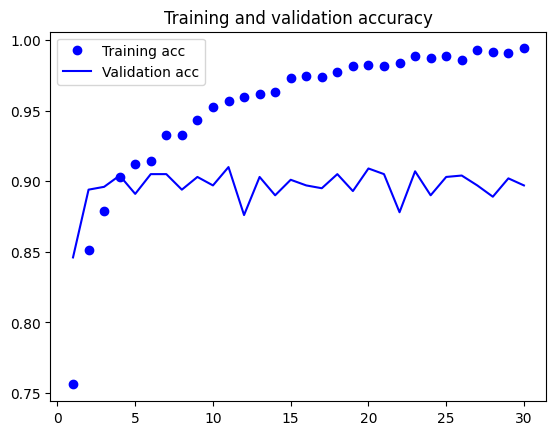

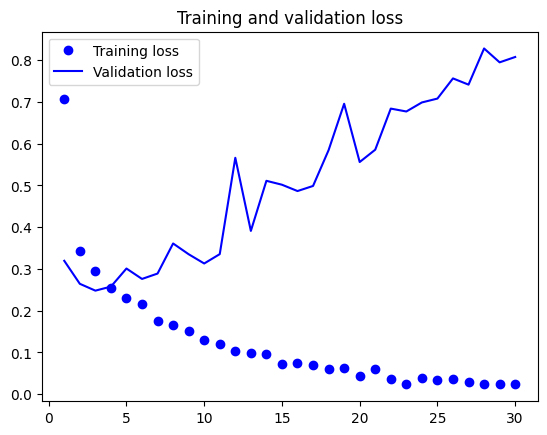

In [51]:
# plotting the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Notes:
# - You reach a validation accuracy of about 90%
# - But the plots also indicate that you’re overfitting almost from the start
# - That’s because this technique doesn’t use data augmentation, which is essential for preventing overfitting with small image datasets.

In [ ]:
# pretrained convnet - feature extraction with data augmentation
# extend the conv_base model and running it end to end on the inputs
# Note:
# - this technique is so expensive that you should only attempt it if you have access to a GPU—it’s absolutely intractable on CPU

In [ ]:
# Using a pretrained convnet - fine-tuning